# data collection and upadtion


In [2]:

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
from sklearn.preprocessing import MinMaxScaler

In [4]:
file_path = '/content/drive/MyDrive/data files/DB-train.txt'

In [5]:
import os

# Change to the desired directory
os.chdir('/content/drive/MyDrive/data files')  # Replace with your desired path

# Verify the current working directory
print(os.getcwd())

/content/drive/MyDrive/data files


In [6]:

database = pd.read_csv(file_path, sep=" ", header=None)

database.columns = ['num','X1', 'X2', 'X3', 'X4', 'X5', 'F', 'a', 'c', 'ratio', 'vol', 'x_4f', 'x_8i1', 'y_8i1', 'x_8i2', 'y_8i2', 'x_8j', 'z_8j', 'mag']

# Only 14 elememts are considered
elements = ["Al","Co","Cr","Fe","Mn","Mo","Nb","Ni","Pt","Re","Ru","V","W","Zr"]
database.query('X1 == @elements and X2 == @elements and X3 == @elements and X4 == @elements and X5 == @elements', inplace = True)

In [7]:
from sigma import return_heat

database.insert(7, "H", 0.0)
database["H"] = database.apply(return_heat, axis=1)
database.head()

# num   : configuration number
# Xi    : distribution of element in the 5 sites of the sigma phase
# F     : total energy by DFT for 30 atoms (eV)
# H     : heat of formation (kJ/mol)
# a, c  : tetragonal cell parameters (Angstrom)
# ratio : c/a
# vol   : cell volume (Angstrom^3)
# x_4f ... z_8j : internal parameters of non-equivalent positions

,num,X1,X2,X3,X4,X5,F,H,a,c,ratio,vol,x_4f,x_8i1,y_8i1,x_8i2,y_8i2,x_8j,z_8j,mag
0,0,Co,Co,Co,Co,Co,-200.493928,34.041011,8.414141,4.443932,0.5281,314.620448,0.401682,0.461870,0.133075,0.735084,0.066428,0.181777,0.250681,0
1,1,Re,Co,Co,Co,Co,-212.199595,31.054780,8.541367,4.471420,0.5235,326.212154,0.398257,0.457823,0.130912,0.731638,0.065549,0.184765,0.251820,0
2,10,Co,Re,Re,Co,Co,-272.204087,11.376019,8.929005,4.618753,0.5172,368.239921,0.402149,0.466361,0.136393,0.743136,0.061236,0.185949,0.248965,0
3,100,Re,Re,Re,Re,Mo,-359.927133,3.213318,9.639434,4.930596,0.5115,458.144506,0.399441,0.463918,0.134406,0.737602,0.064853,0.183973,0.251373,0
4,1000,Re,Zr,W,W,W,-369.868743,4.795310,9.880161,5.175932,0.5238,505.261963,0.395236,0.470270,0.123692,0.743950,0.059442,0.189766,0.251373,0


In [8]:
y = database['H']
X, y = database.loc[:,'X1':'X5'], database['H']

print(X.shape, y.shape)

(9974, 5) (9974,)


In [9]:
from sklearn.preprocessing import OneHotEncoder
# The 'sparse' argument was renamed to 'sparse_output' in newer versions.
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

X_ohe = ohe.fit_transform(X)
from sigma import return_radius

zero_data = np.zeros(shape=X.shape)
Radius = pd.DataFrame(zero_data, columns=['R1', 'R2', 'R3', 'R4', 'R5'])
Radius = X.applymap(return_radius)

X_new1=np.append(X_ohe, Radius, axis=1)


# Valence electron numbers

from sigma import return_valen_el

zero_data = np.zeros(shape=X.shape)
Electron = pd.DataFrame(zero_data, columns=['E1', 'E2', 'E3', 'E4', 'E5'])
Electron = X.applymap(return_valen_el)

X_new2=np.append(X_new1, Electron, axis=1)
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(Radius)
Radius.loc[:,:] = scaled_values
scaled_values = scaler.fit_transform(Electron)
Electron.loc[:,:] = scaled_values

# fonction
def return_radius_normed(element):
    return ((return_radius(element)-124)/(160-124))
# fonction
def return_valen_el_normed(element):
    return ((return_valen_el(element)-3)/(10-3))
X_new3=np.append(X_ohe, Radius, axis=1)
X_new3=np.append(X_new3, Electron, axis=1)
X_new3.shape #5*14+5*2

<ipython-input-9-6e154e3d9f5d>:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  Radius = X.applymap(return_radius)
<ipython-input-9-6e154e3d9f5d>:21: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  Electron = X.applymap(return_valen_el)
<ipython-input-9-6e154e3d9f5d>:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.02777778 0.36111111 0.02777778 ... 1.         1.         1.        ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Radius.loc[:,:] = scaled_values
<ipython-input-9-6e154e3d9f5d>:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.02777778 0.02777778 0.36111111 ... 1.         1.         1.        ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Radius.loc[:,:] = scaled_v

(9974, 80)

In [10]:
X_new3.shape

(9974, 80)

In [11]:
from sigma import return_radius

zero_data = np.zeros(shape=X.shape)
Radius = pd.DataFrame(zero_data, columns=['R1', 'R2', 'R3', 'R4', 'R5'])
Radius = X.applymap(return_radius)

X_new1=np.append(X_ohe, Radius, axis=1)


# Valence electron numbers

from sigma import return_valen_el

zero_data = np.zeros(shape=X.shape)
Electron = pd.DataFrame(zero_data, columns=['E1', 'E2', 'E3', 'E4', 'E5'])
Electron = X.applymap(return_valen_el)

X_new2=np.append(X_new1, Electron, axis=1)

<ipython-input-11-38c7a7143c57>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  Radius = X.applymap(return_radius)
<ipython-input-11-38c7a7143c57>:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  Electron = X.applymap(return_valen_el)


In [12]:
X_new2

array([[ 0.,  1.,  0., ...,  9.,  9.,  9.],
       [ 0.,  0.,  0., ...,  9.,  9.,  9.],
       [ 0.,  1.,  0., ...,  7.,  9.,  9.],
       ...,
       [ 0.,  0.,  0., ...,  4.,  4., 10.],
       [ 0.,  0.,  0., ...,  4.,  4.,  8.],
       [ 0.,  0.,  0., ...,  4.,  4.,  5.]])

In [13]:
X_new3=np.append(X_ohe, Radius, axis=1)
X_new3=np.append(X_new3, Electron, axis=1)
X_new3.shape #5*14+5*2

(9974, 80)

In [14]:


from sklearn.ensemble import RandomForestRegressor

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new3, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
energy_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust n_estimators
energy_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = energy_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


Mean Absolute Error (MAE): 1.385315428795058
Mean Squared Error (MSE): 5.142937893226127
R-squared (R2): 0.973285379816469


In [15]:
R2_test = r2_score(y_test, y_pred)
RMSE_test = np.sqrt(mean_squared_error(y_test, y_pred))

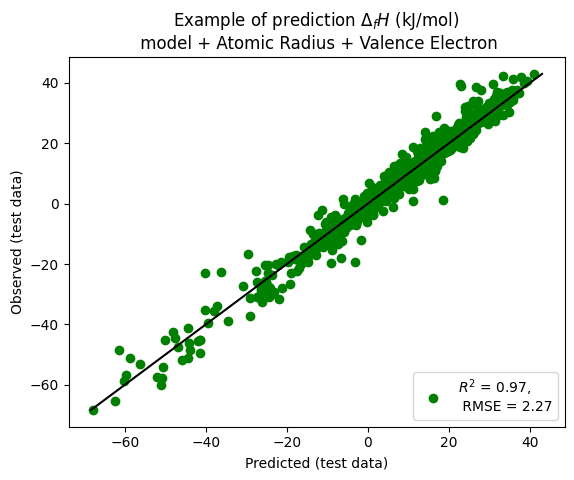

In [16]:
x_tmp = np.linspace(min(min(y_pred), min(y_test)), max(max(y_pred), max(y_test)), 100)
y_tmp = np.linspace(min(min(y_pred), min(y_test)), max(max(y_pred), max(y_test)), 100)

plt.scatter(y_pred, y_test, c='g', label='$R^2$ = ' + str(round(R2_test, 2)) + ',\n RMSE = ' + str(round(RMSE_test, 2)))
plt.xlabel('Predicted (test data)')
plt.ylabel('Observed (test data)')
plt.plot(x_tmp, y_tmp, c='k')

plt.title('Example of prediction $\Delta_fH$ (kJ/mol) \n model + Atomic Radius + Valence Electron')
plt.legend(loc=4)
plt.show()

In [18]:
# prompt: cross validate the energy_model 5 fold cross validation

from sklearn.model_selection import cross_val_score

# Assuming X_new3 and y are defined as in your previous code

# Perform 5-fold cross-validation
cv_scores = cross_val_score(energy_model, X_new3, y, cv=5, scoring='r2')

# Print the cross-validation scores
print("Cross-validation R^2 scores:", cv_scores)
print("Average R^2 score:", np.mean(cv_scores))

# You can also calculate other metrics like MAE or MSE using cross_val_score:
cv_mae_scores = cross_val_score(energy_model, X_new3, y, cv=5, scoring='neg_mean_absolute_error')
print("Cross-validation MAE scores:", cv_mae_scores) # Note: neg_mean_absolute_error because sklearn returns negative MAE
print("Average MAE score:", -np.mean(cv_mae_scores)) # The negative sign is removed here


Cross-validation R^2 scores: [0.90043869 0.89882997 0.95941056 0.82396692 0.66068624]
Average R^2 score: 0.8486664771068634
Cross-validation MAE scores: [-3.33012972 -2.18350377 -1.15624937 -2.87266631 -6.42985675]
Average MAE score: 3.19448118423894


In [19]:
# prompt: feature importance code to measure importance of elemental values i.e fetures befre one hot encoding

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Assuming X_new3 and y are defined as in your previous code (from the provided code)
# ... (your existing code to define X_new3 and y) ...

# Initialize and train the Random Forest model (same as before)
energy_model = RandomForestRegressor(n_estimators=300, random_state=42)
energy_model.fit(X_train, y_train)

# Get feature importances
feature_importances = energy_model.feature_importances_

# Create a DataFrame to display feature importances along with their names
# You'll need to map the numerical feature indices back to their original names.
# Since the feature names are lost after one-hot encoding, we reconstruct them here
element_columns = ['X1', 'X2', 'X3', 'X4', 'X5']
elements = ["Al","Co","Cr","Fe","Mn","Mo","Nb","Ni","Pt","Re","Ru","V","W","Zr"]
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
ohe.fit_transform(X[element_columns])
feature_names = list(ohe.get_feature_names_out(element_columns)) + ['R1', 'R2', 'R3', 'R4', 'R5', 'E1', 'E2', 'E3', 'E4', 'E5']


feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_importance_df


,Feature,Importance
79,E5,0.183312
77,E3,0.135682
78,E4,0.110579
50,X4_Pt,0.083835
71,R2,0.076903
...,...,...
3,X1_Fe,0.000370
7,X1_Ni,0.000353
2,X1_Cr,0.000351
4,X1_Mn,0.000295


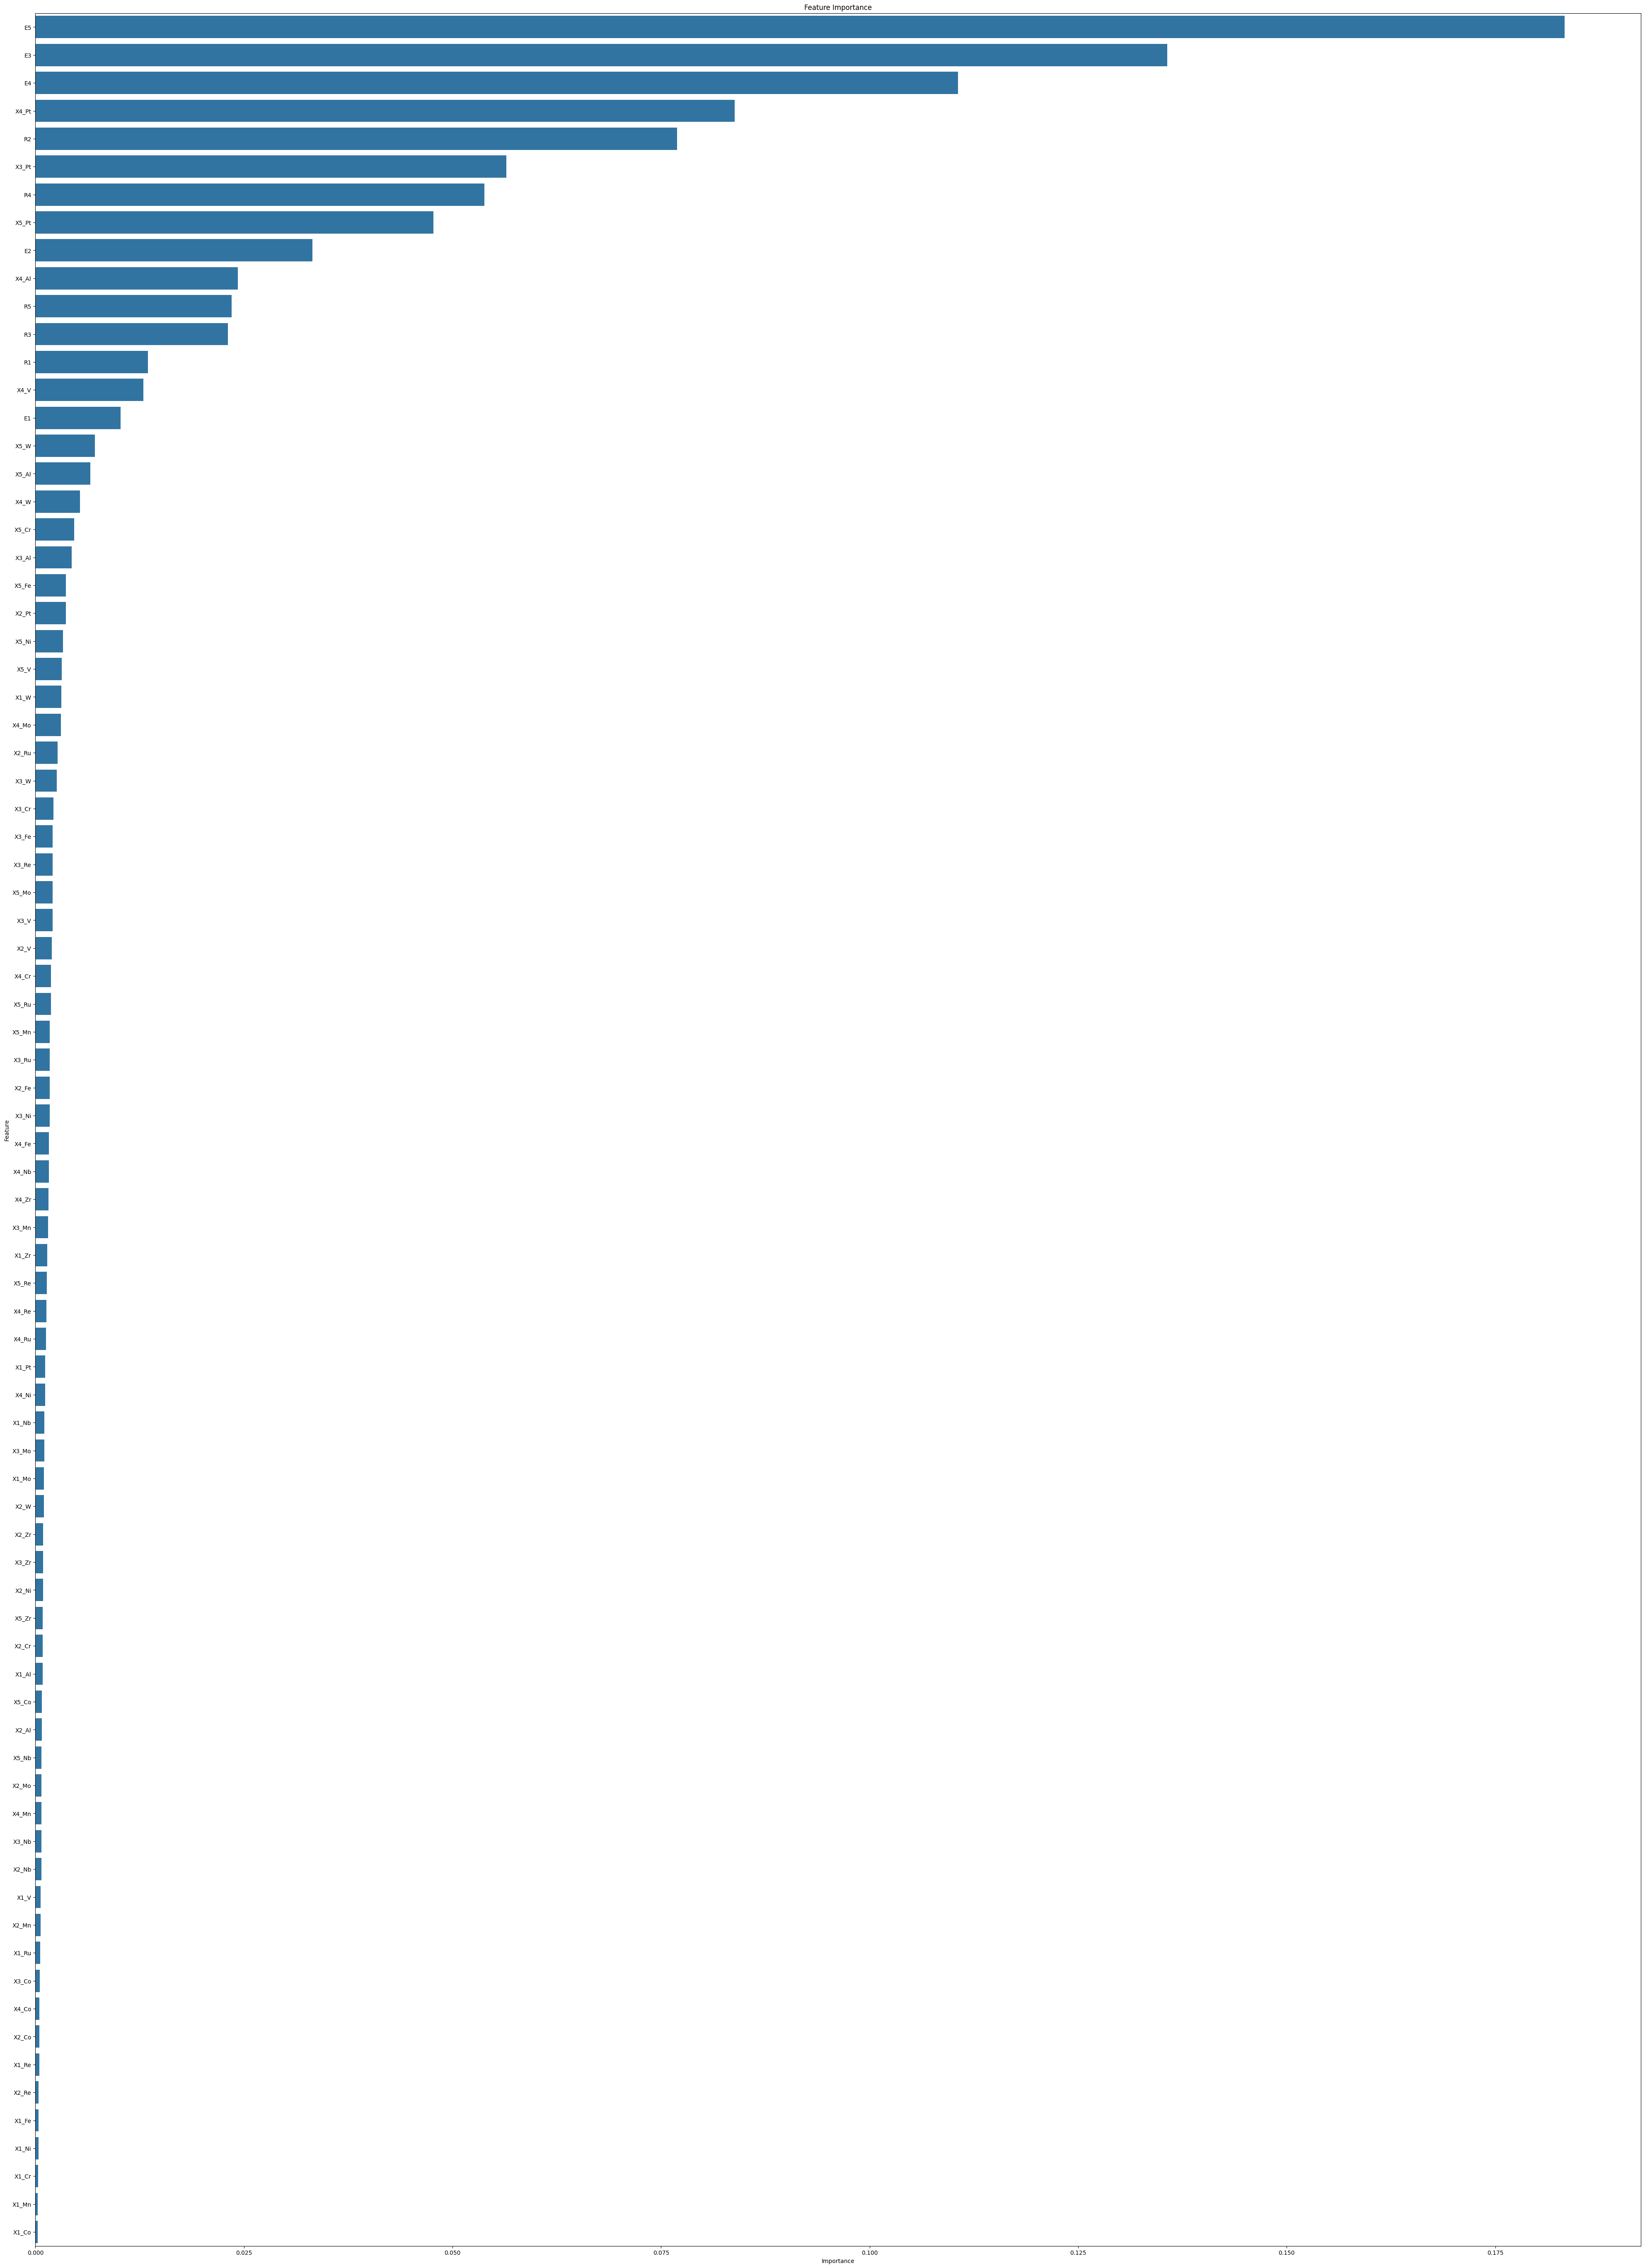

In [20]:


import matplotlib.pyplot as plt
import seaborn as sns




# Plot feature importances
plt.figure(figsize=(50, 70))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [ ]:
# prompt: Shap values and partial dependence plots of energy_model

import shap

# Assuming X_test and energy_model are defined from previous code

# Explain the model's predictions using SHAP values
explainer = shap.TreeExplainer(energy_model)
shap_values = explainer.shap_values(X_test)

# Summarize the effects of all the features
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

# Generate SHAP summary plot
shap.summary_plot(shap_values, X_test)

# Dependence plot for a specific feature (example: feature at index 10)
shap.dependence_plot(10, shap_values, X_test)


In [ ]:
file_path_2 ='/content/drive/MyDrive/data files/Dataset New.xlsx'

In [ ]:
expf=pd.read_excel(file_path_2)

In [ ]:
expf

In [ ]:
# prompt: fill expf nan with 0

# Fill NaN values in the 'expf' DataFrame with 0
expf.fillna(0, inplace=True)


In [ ]:
target=expf['Onset Time(hrs)']

In [ ]:
thermodynamics = expf[['vol% sigma phase formed', 'Temperature(c)', 'Onset Time(hrs)']]

In [ ]:
thermodynamics

In [ ]:
composition = expf.drop(['Type', 'vol% sigma phase formed', 'Temperature(c)', 'Onset Time(hrs)'], axis=1)

In [ ]:
composition

In [ ]:
# Rename columns to remove '%'
composition = composition.rename(columns=lambda x: x.replace('%', ''))

In [ ]:
composition

In [ ]:

# Normalize the row to sum to 1 (i.e., convert wt% to fraction)
def normalize_composition(row):
    return row / row.sum()

# Pick one alloy composition to start with
comp_row = composition.iloc[0]
normalized_comp = normalize_composition(comp_row).to_dict()

site preference is a custom dictionaries can be wriiten from feature imporatnce values are used to map for probable sampling of confihurations from composition


In [ ]:
site_preference = {
        'A': {'Fe': 0.50, 'Cr': 0.30, 'Mo': 0.05, 'Ni': 0.05, 'Si': 0.05, 'V': 0.02, 'Ti': 0.01,'Ce':0.05,
          'Co': 0.005, 'Mn': 0.005, 'W': 0.005, 'Nb': 0.005, 'Cu': 0.005, 'Al': 0.005, 'C': 0.005},
    'B': {'Fe': 0.40, 'Cr': 0.35, 'Mo': 0.05, 'Ni': 0.05, 'Si': 0.05, 'V': 0.03, 'Ti': 0.02,
          'Co': 0.01, 'Mn': 0.01, 'W': 0.005, 'Nb': 0.005, 'Cu': 0.005, 'Al': 0.005, 'C': 0.005},
    'C': {'Fe': 0.35, 'Cr': 0.30, 'Mo': 0.10, 'Ni': 0.05, 'Si': 0.05, 'V': 0.03, 'Ti': 0.02,
          'Co': 0.01, 'Mn': 0.01, 'W': 0.005, 'Nb': 0.005, 'Cu': 0.005, 'Al': 0.005, 'C': 0.005},
    'D': {'Fe': 0.30, 'Cr': 0.25, 'Mo': 0.05, 'Ni': 0.10, 'Si': 0.05, 'V': 0.04, 'Ti': 0.03,
          'Co': 0.02, 'Mn': 0.01, 'W': 0.005, 'Nb': 0.005, 'Cu': 0.005, 'Al': 0.005, 'C': 0.005},
    'E': {'Fe': 0.25, 'Cr': 0.20, 'Mo': 0.05, 'Ni': 0.05, 'Si': 0.25, 'V': 0.05, 'Ti': 0.03,
          'Co': 0.02, 'Mn': 0.01, 'W': 0.005, 'Nb': 0.005, 'Cu': 0.005, 'Al': 0.005, 'C': 0.005}
}



In [ ]:
import site_sampler

samples = site_sampler.generate_site_config(
    composition=normalized_comp,
    site_preference=site_preference,
    total_sites=5,
    num_samples=100
)

# Check the resulting composition
sampled_comp = site_sampler.compute_composition(samples)
print(sampled_comp)

In [ ]:
import pandas as pd
import numpy as np
import site_sampler
from sigma import return_radius, return_valen_el
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder


# Assuming 'composition' DataFrame is defined and available
# ... (your code to define and populate composition DataFrame) ...

# Assuming site_preference is defined as in your previous code
# ... (your code to define site_preference dictionary) ...

# Function to normalize composition (same as before)
def normalize_composition(row):
    # Convert all columns to numeric, errors='coerce' will replace non-numeric with NaN
    numeric_row = pd.to_numeric(row, errors='coerce')
    # Replace NaN values with 0 before calculating the sum to avoid division by 0
    numeric_row = numeric_row.fillna(0)
    row_sum = numeric_row.sum()
    # Avoid division by zero by returning 0 if the sum is 0
    if row_sum == 0:
        return pd.Series(0, index=row.index)  # Return a series of 0s with the same index
    else:
        return numeric_row / row_sum

# Generate d_sites DataFrame
all_d_sites = []
for index in range(composition.shape[0]):  # Iterate over rows of composition
    comp_row = composition.iloc[index]
    normalized_comp = normalize_composition(comp_row).to_dict()

    # Generate site configurations
    samples = site_sampler.generate_site_config(
        composition=normalized_comp,
        site_preference=site_preference,
        total_sites=5,
        num_samples=100  # Adjust the number of samples as needed
    )

    # Convert samples to DataFrame and add Alloy Index
    d_sites_row = pd.DataFrame(samples, columns=['Site1', 'Site2', 'Site3', 'Site4', 'Site5'])
    d_sites_row['Alloy Index'] = index  # Add the alloy index
    all_d_sites.append(d_sites_row)

# Concatenate all d_sites DataFrames into a single DataFrame
d_sites = pd.concat(all_d_sites, ignore_index=True)

# Rename columns to match the original feature names
d_sites = d_sites.rename(columns={
    'Site1': 'X1',
    'Site2': 'X2',
    'Site3': 'X3',
    'Site4': 'X4',
    'Site5': 'X5'
})

In [ ]:
d_sites

In [ ]:
d_sites.shape


In [ ]:
d_sites

In [ ]:
d_sites2=d_sites

In [ ]:
d_sites2

In [ ]:
d_sites

In [ ]:
X_prob = d_sites.loc[:, 'X1':'X5']

In [ ]:
X_prob

In [ ]:
X

In [ ]:


# Now use this re-trained ohe to transform X_prob and generate X_ohe2
X_ohe2 = ohe.transform(X_prob)

In [ ]:



from sigma import return_radius

zero_data = np.zeros(shape=X_prob.shape)
Radius = pd.DataFrame(zero_data, columns=['R1', 'R2', 'R3', 'R4', 'R5'])
# Changed to X_prob to match the shape of X_ohe2
Radius = X_prob.applymap(return_radius)

X_new10 = np.append(X_ohe2, Radius, axis=1)


# Valence electron numbers

from sigma import return_valen_el

zero_data = np.zeros(shape=X_prob.shape)
Electron = pd.DataFrame(zero_data, columns=['E1', 'E2', 'E3', 'E4', 'E5'])
# Changed to X_prob to match the shape of X_ohe2
Electron = X_prob.applymap(return_valen_el)

X_new12 = np.append(X_new10, Electron, axis=1)
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(Radius)
Radius.loc[:,:] = scaled_values
scaled_values = scaler.fit_transform(Electron)
Electron.loc[:,:] = scaled_values

# fonction
def return_radius_normed(element):
    return ((return_radius(element)-124)/(160-124))
# fonction
def return_valen_el_normed(element):
    return ((return_valen_el(element)-3)/(10-3))
X_new13 = np.append(X_ohe2, Radius, axis=1)
X_new13 = np.append(X_new13, Electron, axis=1)
X_new13.shape #5*14+5*2

In [ ]:
elements = ["Al","Co","Cr","Fe","Mn","Mo","Nb","Ni","Pt","Re","Ru","V","W","Zr"]

# ... (Your existing code to define X and X_prob) ...

# Re-train the OneHotEncoder on the specified 14 elements
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore', categories=[elements] * 5)  # Specifying categories for each column
ohe.fit(X[element_columns])

In [ ]:
# prompt: use energy model and give pridictions for x_new13

# Assuming energy_model and X_new13 are defined as in the previous code
# ... (your existing code to define energy_model and X_new13) ...

# Make predictions for X_new13
predictions_x_new13 = energy_model.predict(X_new13)

# Print or further process the predictions
predictions_x_new13.shape


In [ ]:
# prompt: map these pridiction to alloy index with numbers and for same alloy index e_tot = sum of pridiction and as per alloy index append these values to thermodynamics dataframe

# Create a new DataFrame to store the results
thermodynamics_new = pd.DataFrame()

# Group predictions by alloy index
grouped_predictions = pd.DataFrame({'e_tot': predictions_x_new13, 'Alloy Index': d_sites['Alloy Index']}).groupby('Alloy Index')['e_tot'].sum()

# Map alloy indices to their respective total energy predictions
alloy_index_mapping = grouped_predictions.to_dict()

# Iterate through the thermodynamics DataFrame
for index, row in thermodynamics.iterrows():
    alloy_index = index  # Assuming the index of the thermodynamics df corresponds to the alloy index
    if alloy_index in alloy_index_mapping:
      e_tot_value = alloy_index_mapping[alloy_index]
      new_row = row.copy()
      new_row['e_tot'] = e_tot_value
      thermodynamics_new = pd.concat([thermodynamics_new, pd.DataFrame([new_row])], ignore_index=True)
    else:
      print(f"Alloy Index {alloy_index} not found in predictions.")

# Reset the index
thermodynamics_new = thermodynamics_new.reset_index(drop=True)

thermodynamics_new


In [ ]:
# prompt: pair plot between onset time and energy and rest all in pairs

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming thermodynamics_new DataFrame is defined and contains 'Onset Time(hrs)' and 'e_tot' columns
# ... (your existing code to define and populate thermodynamics_new) ...

# Create the pair plot
sns.pairplot(thermodynamics_new, vars=['Onset Time(hrs)', 'e_tot', 'vol% sigma phase formed', 'Temperature(c)'])
plt.show()


In [ ]:
# prompt: pearson corellation  heatmap matrix on thermodynamics_new

# Assuming thermodynamics_new DataFrame is defined and contains relevant columns
# ... (your existing code to define and populate thermodynamics_new) ...

# Calculate the Pearson correlation matrix
correlation_matrix = thermodynamics_new.corr(method='pearson')

# Create the heatmap
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Heatmap Matrix')
plt.show()


In [ ]:
thermodynamics_new.dtypes

In [ ]:
thermodynaics_new = thermodynamics_new.copy()

In [ ]:
# prompt: convert thermodynics_new  every column to to nemerical

# Convert relevant columns to numeric, coercing errors to NaN
for col in ['Onset Time(hrs)', 'e_tot', 'vol% sigma phase formed', 'Temperature(c)']:
    thermodynamics_new[col] = pd.to_numeric(thermodynamics_new[col], errors='coerce')

# Fill NaN values with 0
thermodynamics_new.fillna(0, inplace=True)

thermodynamics_new.dtypes


In [ ]:
thermodynaics_new.isnull()

In [ ]:
thermodynamics_new.isnull()

In [ ]:
# prompt: regression plot between e_tot and vol % sigma phase formed,onset time

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming thermodynamics_new DataFrame is already created as in your previous code

# Create the regression plot
sns.regplot(x='e_tot', y='vol% sigma phase formed', data=thermodynamics_new)
plt.xlabel('Total Energy (e_tot)')
plt.ylabel('Volume % Sigma Phase Formed')
plt.title('Regression Plot: e_tot vs. Volume % Sigma Phase Formed')
plt.show()

sns.regplot(x='e_tot', y='Onset Time(hrs)', data=thermodynamics_new)
plt.xlabel('Total Energy (e_tot)')
plt.ylabel('Onset Time (hrs)')
plt.title('Regression Plot: e_tot vs. Onset Time')
plt.show()


In [ ]:
d_sites

In [ ]:
X_new13

In [ ]:
d_sites

In [ ]:
X_prob

In [ ]:
thermodynamics_new

In [ ]:
# Assuming thermodynamics_new DataFrame is defined and contains 'e_tot' column
# ... (your existing code to define and populate thermodynamics_new) ...

# Convert 'e_tot' from joules to electron volts
thermodynamics_new['e_tot_eV'] = thermodynamics_new['e_tot'] * 6.242e18  # 1 joule = 6.242e18 eV

# Optionally, drop the original 'e_tot' column if you no longer need it
# thermodynamics_new.drop(columns=['e_tot'], inplace=True)

# Display the updated DataFrame
thermodynamics_new.head()

In [ ]:
def compute_CNT_feature(df):
    """
    Given a DataFrame with at least the following columns:
      - 'E_tot': effective formation energy (e.g., in eV, negative values indicate more favorable formation)
      - 'Vol': volume fraction of sigma phase (as a fraction between 0 and 1)

    This function computes a new feature based on classical nucleation theory:

      CNT_feature = (-E_tot) * (-ln(1 - Vol))

    The idea is that -E_tot represents the thermodynamic driving force
    (with more negative E_tot meaning a stronger drive), and -ln(1-Vol)
    emphasizes the kinetics of transformation (larger as Vol increases).

    Returns the DataFrame with a new column 'CNT_feature'.
    """
    df = df.copy()
    # Make sure that Vol is clipped so we do not take the log of zero
    df['Vol_clipped'] = df['vol% sigma phase formed'].clip(upper=0.99)
    # Compute the new feature:
    df['CNT_feature'] = (-df['e_tot_eV']) * (-np.log(1 - df['Vol_clipped']))
    # Optionally, drop the temporary column:
    df.drop(columns=['Vol_clipped'], inplace=True)
    return df

In [ ]:
feature_transformation = compute_CNT_feature(thermodynamics_new)

In [ ]:
# prompt: energy_model learning curves

import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Assuming energy_model, X_new3, and y are defined as in your previous code
# ... (your existing code to define energy_model, X_new3, and y) ...

train_sizes, train_scores, test_scores = learning_curve(
    energy_model, X_new3, y, cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curve (Random Forest)")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.grid()

plt.fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color="r",
)
plt.fill_between(
    train_sizes,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.1,
    color="g",
)
plt.plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()


In [ ]:
feature_transformation


In [ ]:
# prompt: pearson corelation heatmap and spearmen corelation  heatmapof feature_transformation coloumns

# Assuming feature_transformation DataFrame is defined and contains relevant columns
# ... (your existing code to define and populate feature_transformation) ...

# Calculate the Pearson correlation matrix
pearson_corr_matrix = feature_transformation.corr(method='pearson')

# Create the Pearson correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pearson_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Heatmap')
plt.show()

# Calculate the Spearman correlation matrix
spearman_corr_matrix = feature_transformation.corr(method='spearman')

# Create the Spearman correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(spearman_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation Heatmap')
plt.show()


In [ ]:
# prompt: concate feature_transformation to composition

# Concatenate feature_transformation to composition
composition_with_features = pd.concat([composition, feature_transformation], axis=1)

composition_with_features


In [ ]:
target

In [ ]:
composition_with_features

In [ ]:
# prompt: save composition_with thermodynamic features to a csv file and save in  datafiles

# Assuming composition_with_features DataFrame is defined
# ... (your existing code to define and populate composition_with_features) ...

# Save the DataFrame to a CSV file in the specified directory
file_path = '/content/drive/MyDrive/data files/composition_with_thermodynamic_features.csv'
composition_with_features.to_csv(file_path, index=False)  # index=False prevents saving row indices


In [ ]:
x_new_train=composition_with_features.drop(columns=['Onset Time(hrs)','vol% sigma phase formed','e_tot','e_tot_eV'])

In [ ]:
x_new_train
x_new_train2=x_new_train.drop(columns=['Temperature(c)','CNT_feature'])
x_new_train3=x_new_train.drop(columns=['Temperature(c)'])

In [ ]:
# prompt: change target variable to numeric

# Convert 'Onset Time(hrs)' to numeric, coercing errors to NaN
target = pd.to_numeric(target, errors='coerce')

# Fill NaN values in 'Onset Time(hrs)' with 0



In [ ]:
# prompt: convert x_new_train,x_new_train2,x_new_train3 into numeric

# Convert relevant columns to numeric, coercing errors to NaN
for col in x_new_train.columns:
    x_new_train[col] = pd.to_numeric(x_new_train[col], errors='coerce')

for col in x_new_train2.columns:
    x_new_train2[col] = pd.to_numeric(x_new_train2[col], errors='coerce')

for col in x_new_train3.columns:
    x_new_train3[col] = pd.to_numeric(x_new_train3[col], errors='coerce')

# Fill NaN values with 0
x_new_train.fillna(0, inplace=True)
x_new_train2.fillna(0, inplace=True)
x_new_train3.fillna(0, inplace=True)


In [ ]:
x_new_train2.dtypes


In [ ]:
x_new_train3.dtypes


In [ ]:
x_new_train.dtypes

In [ ]:
target.fillna(0)

In [ ]:
yt_train,yt_test.dtypes


In [ ]:
# prompt: split target and x_new train to fit random forest to pridict target from x_new_train

# Split the data into training and testing sets
Xt_train, Xt_test, yt_train, yt_test = train_test_split(x_new_train3, target, test_size=0.2, random_state=42)

# Initialize and train a new RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust hyperparameters
rf_model.fit(Xt_train, yt_train)

# Make predictions on the test set
yt_pred = rf_model.predict(Xt_test)

# Evaluate the model
mae = mean_absolute_error(yt_test, y_pred)
mse = mean_squared_error(yt_test, yt_pred)
r2 = r2_score(yt_test, yt_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


In [ ]:
# prompt: split target and x_new train to fit random forest to pridict target from x_new_train

# Split the data into training and testing sets
Xt_train, Xt_test, yt_train, yt_test = train_test_split(x_new_train2, target, test_size=0.2, random_state=42)

# Convert yt_train and yt_test to numeric, handling non-numeric values and filling NaNs with 0
yt_train = yt_train.apply(lambda x: pd.to_numeric(str(x).replace('s', ''), errors='coerce')).fillna(0)
yt_test = yt_test.apply(lambda x: pd.to_numeric(str(x).replace('s', ''), errors='coerce')).fillna(0)


# Initialize and train a new RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust hyperparameters
rf_model.fit(Xt_train, yt_train)

# Make predictions on the test set
yt_pred = rf_model.predict(Xt_test)

# Evaluate the model
mae = mean_absolute_error(yt_test, yt_pred)
mse = mean_squared_error(yt_test, yt_pred)
r2 = r2_score(yt_test, yt_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

In [ ]:
# prompt: write code to use random forest to pridict target from x_new_train

# Assuming x_new_train and target are defined as in your previous code
# ... (your existing code to define x_new_train and target) ...

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=300, random_state=42)  # You can adjust n_estimators
rf_model.fit(x_new_train, target)

# Make predictions on the x_new_train data
target_pred = rf_model.predict(x_new_train)

# Evaluate the model (optional)
mae = mean_absolute_error(target, target_pred)
mse = mean_squared_error(target, target_pred)
r2 = r2_score(target, target_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


In [ ]:
rf_model = RandomForestRegressor(n_estimators=300, random_state=42)  # You can adjust n_estimators
rf_model.fit(x_new_train, target)

# Make predictions on the x_new_train data
target_pred = rf_model.predict(x_new_train)

# Evaluate the model (optional)
mae = mean_absolute_error(target, target_pred)
mse = mean_squared_error(target, target_pred)
r2 = r2_score(target, target_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

In [ ]:
rf_model = RandomForestRegressor(n_estimators=300, random_state=42)  # You can adjust n_estimators
rf_model.fit(x_new_train, target)

# Make predictions on the x_new_train data
target_pred = rf_model.predict(x_new_train)

# Evaluate the model (optional)
mae = mean_absolute_error(target, target_pred)
mse = mean_squared_error(target, target_pred)
r2 = r2_score(target, target_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

In [ ]:
x_new_train

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define features (X) and target (y)
X = x_new_train.drop(columns=['Temperature(c)',])# Assuming 'Onset Time(hrs)' is your target
y = target

# Convert all columns in X to numeric, replacing non-numeric with NaN
for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')

# Fill NaN values with 0 (or another appropriate strategy)
X.fillna(0, inplace=True)

# Convert the target variable to numeric, handling non-numeric values
y = y.apply(lambda x: pd.to_numeric(str(x).replace('s', ''), errors='coerce')).fillna(0) # Convert '250s' to 250.0


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=400, random_state=42)  # Adjust parameters as needed
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")



In [ ]:
# prompt: hyperparameter tuning and cross validation

from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

rf_random.best_params_


In [ ]:
# prompt: best model = rf_model(best parms) give r2 score and learn urves of est model

# Assuming rf_random.best_params_ is defined from the previous code
best_params = rf_random.best_params_

# Create and train the best model
best_rf_model = RandomForestRegressor(**best_params, random_state=42)
best_rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_rf_model.predict(X_test)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared score of the best model: {r2}")

# Learning Curves
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_rf_model, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='r2'
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1)

plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1)

plt.xlabel('Training examples')
plt.ylabel('R-squared score')
plt.title('Learning Curves')
plt.legend(loc='best')
plt.grid()
plt.show()


In [ ]:
x_new_train

In [ ]:
y = y.apply(lambda x: pd.to_numeric(str(x).replace('s', ''), errors='coerce')).fillna(0) # Convert '250s' to 250.0


In [ ]:
# prompt: use ada boost and xg boost on x_new_train.drop(temeperature and cnt_feature

# Assuming x_new_train and y are defined as in your previous code
# ... (your existing code to define x_new_train and y) ...

from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

# Drop 'Temperature(c)' and 'CNT_feature'
X = x_new_train.drop(columns=['Temperature(c)', 'CNT_feature'])

# Convert all columns in X to numeric, replacing non-numeric with NaN
for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')

# Fill NaN values with 0 (or another appropriate strategy)
X.fillna(0, inplace=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


# AdaBoost
ada_model = AdaBoostRegressor(random_state=42) # You can tune hyperparameters
ada_model.fit(X_train, y_train)
ada_pred = ada_model.predict(X_test)
ada_mse = mean_squared_error(y_test, ada_pred)
ada_r2 = r2_score(y_test, ada_pred)
print(f"AdaBoost - Mean Squared Error: {ada_mse}")
print(f"AdaBoost - R-squared: {ada_r2}")


# XGBoost
xgb_model = XGBRegressor(random_state=42) # You can tune hyperparameters
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)
print(f"XGBoost - Mean Squared Error: {xgb_mse}")
print(f"XGBoost - R-squared: {xgb_r2}")


In [ ]:
# prompt: from composition pridict target using xg boost regressor and adaboost regressor

from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Assuming x_new_train and target are defined from previous code
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_new_train, target, test_size=0.2, random_state=42)

# Convert y_train and y_test to numeric, handling non-numeric values
y_train = y_train.apply(lambda x: pd.to_numeric(str(x).replace('s', ''), errors='coerce')).fillna(0)
y_test = y_test.apply(lambda x: pd.to_numeric(str(x).replace('s', ''), errors='coerce')).fillna(0)

# Initialize and train XGBoost regressor
xgb_model = GradientBoostingRegressor(random_state=42) # Or any other suitable parameters for XGBoost
xgb_model.fit(X_train, y_train)

# Make predictions with XGBoost
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate XGBoost
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Regressor:")
print(f"Mean Squared Error: {mse_xgb}")
print(f"R-squared: {r2_xgb}")

# Initialize and train AdaBoost regressor
ada_model = AdaBoostRegressor(random_state=42) # Or any other suitable parameters for AdaBoost
ada_model.fit(X_train, y_train)

# Make predictions with AdaBoost
y_pred_ada = ada_model.predict(X_test)

# Evaluate AdaBoost
mse_ada = mean_squared_error(y_test, y_pred_ada)
r2_ada = r2_score(y_test, y_pred_ada)

print("\nAdaBoost Regressor:")
print(f"Mean Squared Error: {mse_ada}")
print(f"R-squared: {r2_ada}")

In [ ]:
# prompt: random forest with x_new_train.drop(temeperature and cnt featrure for pridiction of target

# Assuming x_new_train and target are defined from previous code
# Drop 'Temperature(c)' and 'CNT_feature'
X = x_new_train.drop(columns=['Temperature(c)', 'CNT_feature'])

# Convert all columns in X to numeric, replacing non-numeric with NaN
for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')

# Fill NaN values with 0 (or another appropriate strategy)
X.fillna(0, inplace=True)

# Convert the target variable to numeric, handling non-numeric values
y = target.apply(lambda x: pd.to_numeric(str(x).replace('s', ''), errors='coerce')).fillna(0)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Initialize and train the Random Forest model
rf_model_without_thermodynamic= RandomForestRegressor(n_estimators=400, random_state=42)  # You can adjust n_estimators
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


In [ ]:
# prompt: hyper parameter tuning and learning curves and feature importance of rf_model_without_thermodynamic

# Hyperparameter Tuning (already present in your code, but ensuring best practices)
# ... (your existing hyperparameter tuning code using RandomizedSearchCV) ...

# After hyperparameter tuning, retrain the best model
best_rf_model.fit(X_train, y_train)


# Feature Importance
feature_importances = best_rf_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()


# Learning Curves (already present in your code, but improved plotting)

train_sizes, train_scores, test_scores = learning_curve(
    best_rf_model, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='r2'
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label="Training score", color="blue")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="lightblue", alpha=0.5)
plt.plot(train_sizes, test_mean, label="Cross-validation score", color="red")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="lightcoral", alpha=0.5)

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("R-squared"), plt.legend(loc="best")
plt.tight_layout()
plt.show()


In [ ]:
# prompt: from x_new_train.drop(temperature)pridict target using random forest

# Assuming x_new_train and target are defined from previous code
# Drop 'Temperature(c)'
X = x_new_train.drop(columns=['Temperature(c)'])

# Convert all columns in X to numeric, replacing non-numeric with NaN
for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')

# Fill NaN values with 0 (or another appropriate strategy)
X.fillna(0, inplace=True)

# Convert the target variable to numeric, handling non-numeric values
y = target.apply(lambda x: pd.to_numeric(str(x).replace('s', ''), errors='coerce')).fillna(0)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Initialize and train the Random Forest model
rf_model_with_thermodynamics = RandomForestRegressor(n_estimators=400, random_state=42)  # You can adjust n_estimators
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


In [ ]:
# prompt: give feature importance,learning curves of rf_model_with_thermodynamics

# Feature Importance
feature_importances = rf_model_with_thermodynamics.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance for rf_model_with_thermodynamics')
plt.show()


# Learning Curves
train_sizes, train_scores, test_scores = learning_curve(
    rf_model_with_thermodynamics, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='r2'
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label="Training score", color="blue")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="lightblue", alpha=0.5)
plt.plot(train_sizes, test_mean, label="Cross-validation score", color="red")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="lightcoral", alpha=0.5)

plt.title("Learning Curve for rf_model_with_thermodynamics")
plt.xlabel("Training Set Size"), plt.ylabel("R-squared"), plt.legend(loc="best")
plt.tight_layout()
plt.show()


In [ ]:


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define features (X) and target (y)
X = composition_with_features.drop(columns=['Onset Time(hrs)','vol% sigma phase formed','e_tot','e_tot_eV']) # Assuming 'Onset Time(hrs)' is your target
y = target

# Convert all columns in X to numeric, replacing non-numeric with NaN
for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')

# Fill NaN values with 0 (or another appropriate strategy)
X.fillna(0, inplace=True)

# Convert the target variable to numeric, handling non-numeric values
y = y.apply(lambda x: pd.to_numeric(str(x).replace('s', ''), errors='coerce')).fillna(0) # Convert '250s' to 250.0


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Adjust parameters as needed
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

In [ ]:
# prompt: feature importance of rf_model

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances along with their names
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance DataFrame
print(feature_importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [ ]:
# prompt: regression plots to evaluvate rf_model

# Assuming rf_model, X_test, and y_test are defined as in your previous code
# ... (your existing code to define rf_model, X_test, and y_test) ...

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Create a DataFrame for plotting
plot_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Regression plot for predicted vs actual values
sns.regplot(x='Actual', y='Predicted', data=plot_df)
plt.xlabel("Actual Onset Time (hrs)")
plt.ylabel("Predicted Onset Time (hrs)")
plt.title("Regression Plot of Actual vs. Predicted Onset Time")
plt.show()


In [ ]:


from sklearn.model_selection import learning_curve

# Function to plot learning curves
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='r2'
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curve for rf_model
plot_learning_curve(rf_model, "Learning Curve (Random Forest)", X, y, cv=5)
plt.show()

# Assuming energy_model, X, and y are defined (replace with your actual data and model)
# ... (your existing code to define energy_model, X and y)

# Plot learning curve for energy_model
plot_learning_curve(energy_model, "Learning Curve (Energy Model)", X, y, cv=5)  # Assuming 5-fold cross-validation
plt.show()
